## Add description

In [53]:
# import essential packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
# access the dataset
raw_data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [55]:
# print the dataset
raw_data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [56]:
# count of rows and columns
raw_data.shape

(768, 10)

In [57]:
# data type of attributes
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [58]:
# statistical descriptions on each attributes
raw_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


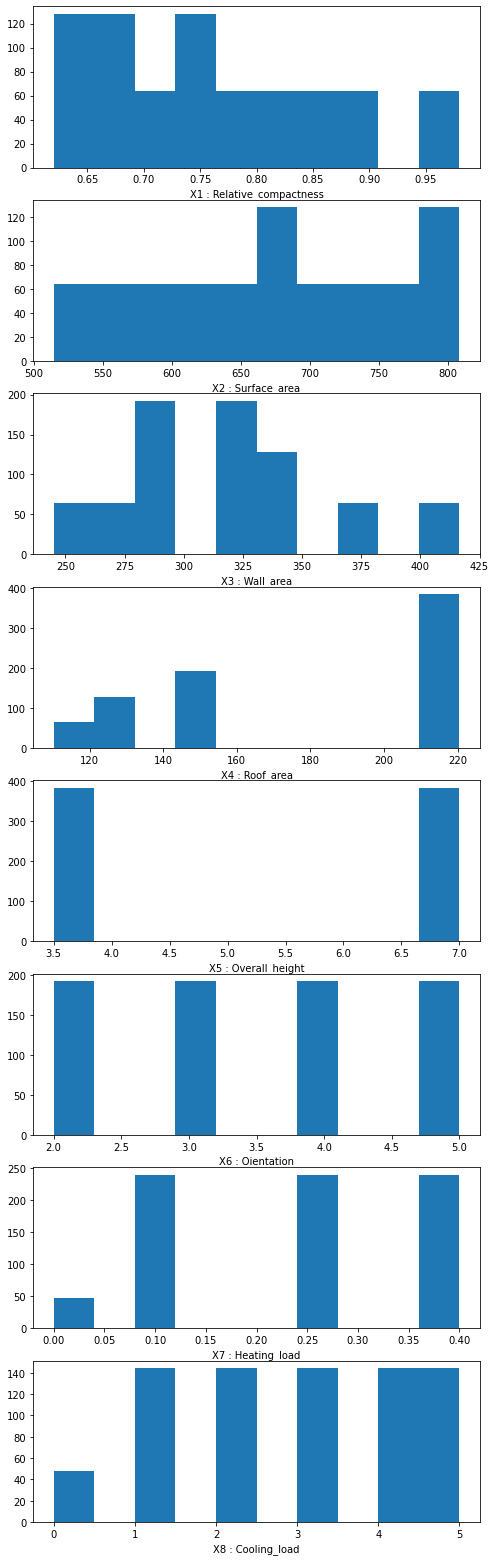

In [59]:
# histogram of each attributes
new_col = ["Relative_compactness", "Surface_area", "Wall_area", "Roof_area",
           "Overall_height", "Oientation", "Heating_load", "Cooling_load"]
plt.figure(figsize=(8,35))
for i, col_label, col in zip(range(1,11), new_col, raw_data.columns):
    plt.subplot(10,1,i+1)
    plt.hist(raw_data[col])
    plt.xlabel(col+" : "+col_label)

,Y1,Y2
X1,0.622272,0.634339
X2,-0.658120,-0.672999
X3,0.455671,0.427117
X4,-0.861828,-0.862547
X5,0.889430,0.895785
X6,-0.002587,0.014290
X7,0.269842,0.207505
X8,0.087368,0.050525


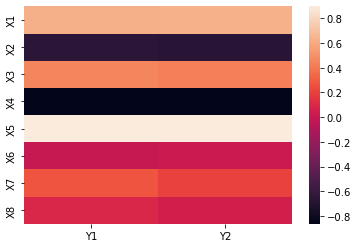

In [60]:
# pearson correleation analysis
sns.heatmap(raw_data.corr(method='pearson').iloc[:8,8:])
raw_data.corr(method='pearson').iloc[:8,8:]

,Y1,Y2
X1,0.622135,0.651019
X2,-0.622135,-0.651019
X3,0.471458,0.415991
X4,-0.804027,-0.803175
X5,0.861283,0.864876
X6,-0.004168,0.017606
X7,0.322860,0.288904
X8,0.068343,0.046477


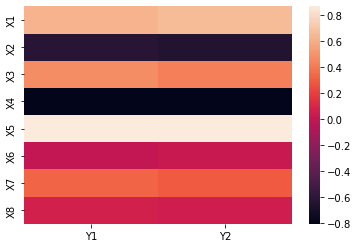

In [61]:
# spearman correleation analysis
sns.heatmap(raw_data.corr(method='spearman').iloc[:8,8:])
raw_data.corr(method='spearman').iloc[:8,8:]

,Y1,Y2
X1,0.354102,0.387094
X2,-0.354102,-0.387094
X3,0.342376,0.303497
X4,-0.610172,-0.605611
X5,0.703986,0.706818
X6,-0.003147,0.013042
X7,0.263231,0.239813
X8,0.048711,0.033074


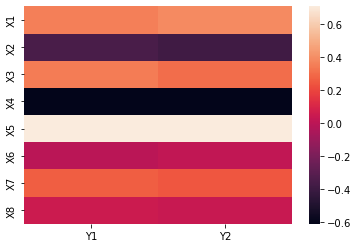

In [62]:
# kendall correleation analysis
sns.heatmap(raw_data.corr(method='kendall').iloc[:8,8:])
raw_data.corr(method='kendall').iloc[:8,8:]

In [64]:
# build a linear model
X = raw_data.drop(["Y1", "Y2"], axis=1)
y = raw_data[["Y1", "Y2"]]
LR = LinearRegression().fit(X, y)
y_pred = LR.predict(X)
display(LR.score(X, y))
display(mean_squared_error(y, y_pred))

0.9020502353790908

9.326638698999727

In [65]:
LR.intercept_

array([84.02594531, 97.46276042])

In [66]:
LR.coef_

array([[-6.47806434e+01,  3.23112859e+10, -3.23112859e+10,
        -6.46225718e+10,  4.16948897e+00, -2.33158932e-02,
         1.99327366e+01,  2.03765322e-01],
       [-7.08696881e+01,  3.67318524e+11, -3.67318524e+11,
        -7.34637049e+11,  4.27840979e+00,  1.21625128e-01,
         1.47170628e+01,  4.06495438e-02]])

In [67]:
# print a equation based on coef_ and intercept_